In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [6]:
DATASET_PATH = 'insurance.csv'
df = pd.read_csv(DATASET_PATH)
df['charges'].mean()


np.float64(13270.422265141257)

In [3]:
smoker_Encoded = pd.get_dummies(df['smoker'])
sex_Encoded = pd.get_dummies(df['sex'])
region_Encoded = pd.get_dummies(df['region'])

In [31]:
region_Encoded

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [4]:
df = df.drop(["sex", "smoker", "region"], axis=1)


In [5]:
df = pd.concat([df, smoker_Encoded,sex_Encoded,region_Encoded],axis=1)

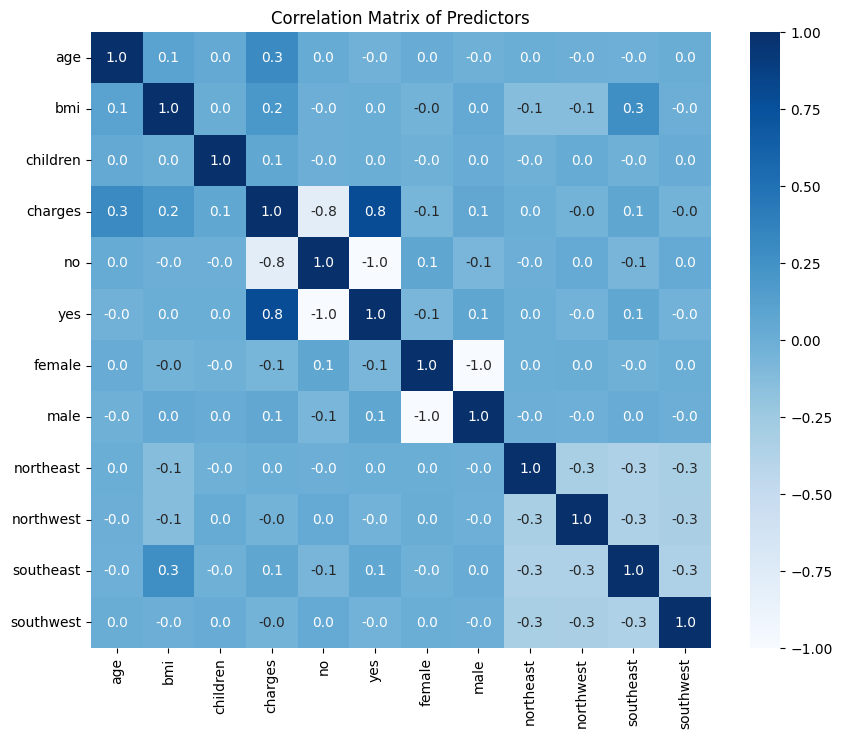

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".1f")
plt.title("Correlation Matrix of Predictors")
plt.show()

In [7]:
X = df.drop('charges',axis=1)
y = df['charges']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import ElasticNet

In [14]:
base_elastic_model = ElasticNet()

In [15]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [18]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.554e+10, tolerance: 1.441e+07
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+10, tolerance: 1.410e+07
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [19]:
grid_model.best_params_

{'alpha': 50, 'l1_ratio': 1}

In [20]:
y_pred = grid_model.predict(scaled_X_test)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
mean_absolute_error(y_test,y_pred)

4589.728862122495

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(6572.854028293241)

In [24]:
#r_squared = r2_score(y_test, y_pred)
#r_squared

In [25]:
np.mean(df['charges'])

np.float64(13270.422265141257)

In [26]:
df

,age,bmi,children,charges,no,yes,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,True,False,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,False,True,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [27]:
from joblib import dump,load

dump(grid_model,'insurance_model.joblib')
loaded_model = load('insurance_model.joblib')
loaded_model.predict([[19,27.900,0,0,1,1,0,0,0,0,1]])

array([135884.52758681])

In [28]:
df.head(3)

,age,bmi,children,charges,no,yes,female,male,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.9240,False,True,True,False,False,False,False,True
1,18,33.77,1,1725.5523,True,False,False,True,False,False,True,False
2,28,33.00,3,4449.4620,True,False,False,True,False,False,True,False


In [29]:
prueba=[[28,33.77,3,1,0,0,1,0,0,1,0]]
prueba2 = scaler.transform(prueba)
loaded_model.predict(prueba2)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([7089.10634964])

In [30]:
prueba=[[19,27.900,0,0,1,1,0,0,0,0,1]]
prueba2 = scaler.transform(prueba)
loaded_model.predict(prueba2)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25385.69442802])